In [2]:
!python -m pip install -U matplotlib
!python -m pip install -U numpy

Text(0.5, 1.0, 'Histograma da Equalização')

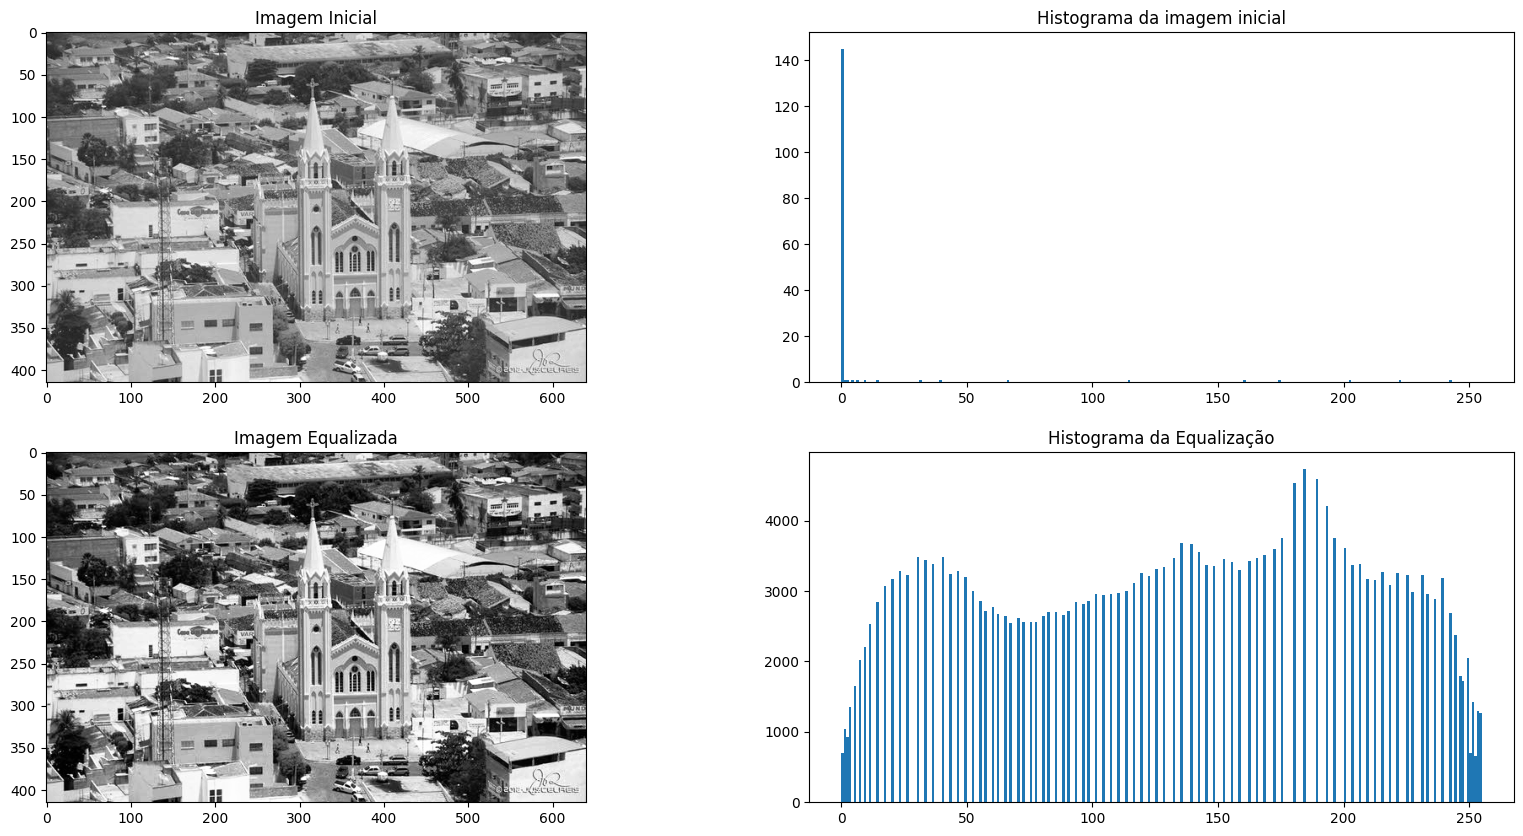

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def histograma(imagem):
    """
    Calcula o histograma de uma imagem em tons de cinza.

    Args:
        imagem (ndarray): A imagem de entrada em tons de cinza.

    Returns:
        ndarray: Um array de 256 elementos representando o histograma.
    """
    histogram = np.zeros(256, dtype=int)
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            histogram[imagem[i, j]] += 1
    return histogram

def manual_cumsum(arr):
    """
    Calcula a soma acumulada de um array.

    Args:
        arr (ndarray): O array de entrada.

    Returns:
        ndarray: A soma acumulada do array de entrada.
    """
    cumsum = [arr[0]]
    for i in range(1, len(arr)):
        cumsum.append(cumsum[i - 1] + arr[i])
    return np.array(cumsum)

def equalizacao_histograma(imagem):
    """
    Equaliza o histograma de uma imagem em tons de cinza.

    Args:
        imagem (ndarray): A imagem de entrada em tons de cinza.

    Returns:
        ndarray: A imagem equalizada.
    """
    histogram = histograma(imagem)
    cdf = manual_cumsum(histogram)
    cdf_min = cdf.min()
    num_pixels = imagem.shape[0] * imagem.shape[1]
    eq_imagem = np.floor((cdf[imagem] - cdf_min) / (num_pixels - cdf_min) * 255)
    return eq_imagem.astype(np.uint8)

# Carrega a imagem de entrada
imagem = plt.imread('picos_claro.jpg')

# Equaliza a imagem
imagem_equalizada = equalizacao_histograma(imagem)



# Exibe a imagem equalizada e seu histograma
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0][0].imshow(imagem, cmap="gray")
ax[0][0].set_title("Imagem Inicial")
ax[0][1].hist(histograma(imagem), range(256))
ax[0][1].set_title('Histograma da imagem inicial')

ax[1][0].imshow(imagem_equalizada, cmap="gray")
ax[1][0].set_title('Imagem Equalizada')
ax[1][1].hist(imagem_equalizada.ravel(), range(256))
ax[1][1].set_title('Histograma da Equalização')

